# Reading Tweets

In [23]:
import glob, json, os
list_of_files = (glob.glob("./twitter_stream_data/*.txt"))
len(list_of_files)

63

In [36]:
def read_files(list_of_files):
    '''
    Read all the TXT files into a "list of dictionary objects" called "tweets_data"
    '''
    tweets_data = []
    timestamp  = []
    
    for fname in list_of_files:
        tweets_file = open(fname, "r")
        for line in tweets_file:
            try:
                tweet = json.loads(line)
                tweets_data.append(tweet)
                
                ts = os.path.splitext(os.path.basename(fname))[0]
                timestamp.append(ts)

            except:
                continue
                
    return (tweets_data, timestamp)

We can print the number of tweets using the command below.

In [38]:
tweets_data, timestamp = read_files(list_of_files)
len(timestamp)

303

In [13]:
tweets_data[0]['text']

'RT @AndroidAuth: #Nokia8 Sirocco hands-on: High-end #AndroidOne.\n\nWatch full video: https://t.co/uIvfszlhE5\n\nRead more: https://t.co/9notPu…'

Next, we will structure the tweets data into a pandas DataFrame to simplify the data manipulation. We will start by creating an empty DataFrame called tweets using the following command.

In [39]:
import pandas as pd
tweets = pd.DataFrame()

Next, we will add 3 columns to the tweets DataFrame called text, lang, and country. text column contains the tweet, lang column contains the language in which the tweet was written, and country the country from which the tweet was sent.

In [40]:
tweets['text'] = list(map(lambda tweet: tweet['text'] if 'text' in tweet else None, tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'] if 'lang' in tweet else None, tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if ('place' in tweet and (tweet['place'] != None)) else None, tweets_data))
tweets['timestamp'] = pd.to_datetime(timestamp, format="%Y-%m-%d_%H_%M")

Preview the **tweets** DataFrame

In [85]:
tweets.tail(10)

,text,lang,country,timestamp,sentiment
293,Snow and dog!! #dog #baby #play #xperia #winte...,en,None,2018-03-01 20:16:00,0.175000
294,Samsung Galaxy S9 vs Apple iPhone X: the weigh...,en,None,2018-03-01 20:16:00,0.000000
295,RT @SuperSaf: Just enjoying the views of beaut...,en,None,2018-03-01 20:16:00,0.533333
296,What feature do you like best on the Galaxy S9...,en,None,2018-03-01 20:16:00,0.319444
297,RT @TopAchat: Ils sont pour qui ces #GalaxyS9 ...,fr,None,2018-03-01 20:16:00,NaN
298,RT @SamsungEspana: Lo estabais deseando. #Gala...,es,None,2018-03-01 20:16:00,NaN
299,RT @SamsungEspana: Sé el protagonista de tu me...,es,None,2018-03-01 20:16:00,NaN
300,RT @GExperienceFR: Focus sur l’appareil #photo...,fr,None,2018-03-01 20:16:00,NaN
301,RT @GExperienceFR: Focus sur l’appareil #photo...,fr,None,2018-03-01 20:16:00,NaN
302,RT @GExperienceFR: Focus sur les fonctionnalit...,fr,None,2018-03-01 20:17:00,NaN


In [86]:
tweets[  tweets['country'].notnull()  ].head()

,text,lang,country,timestamp,sentiment


# Sentiment analysis with textblob

In [61]:
from textblob import TextBlob
# define a function that accepts text and returns the polarity
def detect_sentiment(row):
    
    text = row.text
    lang = row.lang
    
    # use this line for Python 2 (avoids UnicodeDecodeError for some reviews)
    # blob = TextBlob(text.decode(encoding='utf-8'))
    
    # use this line instead for Python 3
    blob = TextBlob(text)
    
    # return the polarity
    return blob.sentiment.polarity if lang=="en" else None

In [65]:
# create a new DataFrame column for sentiment (WARNING: SLOW!)
# feature engineering
tweets['sentiment'] = tweets.apply(detect_sentiment,axis=1)
tweets.head()

,text,lang,country,timestamp,sentiment
0,RT @AndroidAuth: #Nokia8 Sirocco hands-on: Hig...,en,None,2018-03-01 13:36:00,0.425000
1,RT @VodafoneUK: RT for your chance to #WIN the...,en,None,2018-03-01 13:36:00,0.468182
2,RT @ChandaPardhi: #हमको_भी_मरना_है तो क्यो न स...,hi,None,2018-03-01 13:37:00,NaN
3,Win A #Samsung #GalaxyS9 With #Android Headlin...,en,None,2018-03-01 13:37:00,0.800000
4,RT @W6Df3B4zcr2s6ri: #GalaxyS9\n#हमको_भी_मरना_...,hi,None,2018-03-01 13:37:00,NaN


In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

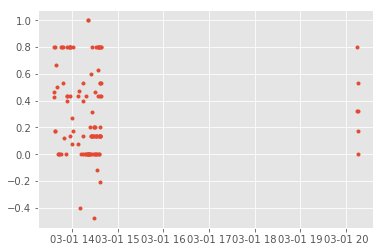

In [88]:
plt.plot(tweets.timestamp, tweets.sentiment, '.')